Learnings from https://medium.com/correll-lab/a-primer-on-using-pytorch-optimizers-7a97e0999095

Perform Gradient Descent on a convex function

Let's plot some functions, and choose one

1. y=(x-3)^2
2. y = x^2
3. y = x^3

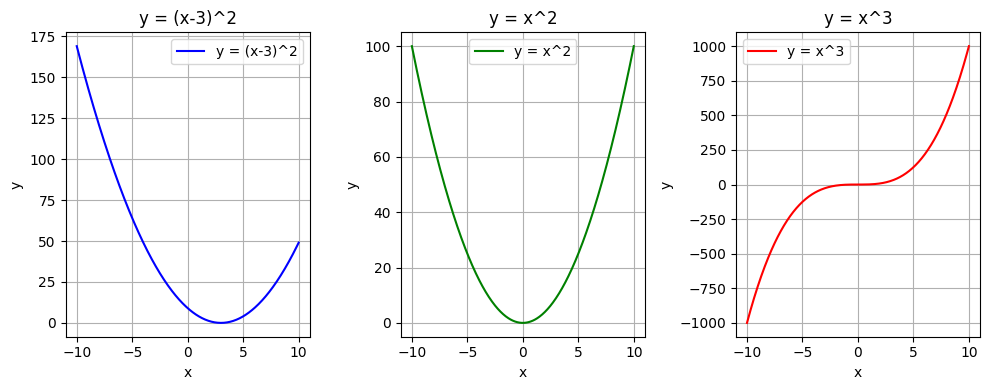

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# Define the x range
x = np.linspace(-10, 10, 500)

# Define the functions
y1 = (x - 3)**2
y2 = x**2
y3 = x**3

# Plot the functions
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot y1
axs[0].plot(x, y1, label='y = (x-3)^2', color='blue')
axs[0].set_title('y = (x-3)^2')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid()
axs[0].legend()

# Plot y2
axs[1].plot(x, y2, label='y = x^2', color='green')
axs[1].set_title('y = x^2')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].grid()
axs[1].legend()

# Plot y3
axs[2].plot(x, y3, label='y = x^3', color='red')
axs[2].set_title('y = x^3')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].grid()
axs[2].legend()

plt.tight_layout()

# Show the plot
plt.show()

In [2]:
import torch

num_iterations = 10
learning_rate = 0.1
x = torch.tensor([0.0], requires_grad=True)

for step in range(num_iterations):

    y = (x-3)**2

    y.backward()

    with torch.no_grad():
        x -= learning_rate*x.grad
        x.grad.zero_()

    print(f"Step {step+1}: x = {x.item()}, y = {y.item()}")

print(f"Converged local minima is at {x=}")

Step 1: x = 0.6000000238418579, y = 9.0
Step 2: x = 1.0800000429153442, y = 5.760000228881836
Step 3: x = 1.4639999866485596, y = 3.6863999366760254
Step 4: x = 1.7711999416351318, y = 2.3592960834503174
Step 5: x = 2.0169599056243896, y = 1.5099495649337769
Step 6: x = 2.2135679721832275, y = 0.9663678407669067
Step 7: x = 2.370854377746582, y = 0.6184753179550171
Step 8: x = 2.4966835975646973, y = 0.39582422375679016
Step 9: x = 2.597346782684326, y = 0.2533273994922638
Step 10: x = 2.677877426147461, y = 0.16212961077690125
Converged local minima is at x=tensor([2.6779], requires_grad=True)


We can see that the local minima of x = 3 was not acheived. However, we can see that the value of x is approaching it, so there are a few ways we can go next
1. Increase learning rate to try and converge faster in the same #iterations
2. Increase #iterations

Ok, now let's see what happens when you try GD on a non-convex function such as x^3

In [3]:
num_iterations = 10
learning_rate = 0.1
# x = torch.tensor([0.0], requires_grad=True) # if you do this, the min is already acheived, so no updates will happen
x = torch.rand(size=(1,1), requires_grad=True)

for step in range(num_iterations):

    y = (x)**3

    y.backward()

    with torch.no_grad():
        x -= learning_rate*x.grad
        x.grad.zero_()

    print(f"Step {step+1}: x = {x.item()}, y = {y.item()}")

print(f"Converged local minima is at {x=}")

Step 1: x = 0.5189800262451172, y = 0.26587745547294617
Step 2: x = 0.4381779432296753, y = 0.13978222012519836
Step 3: x = 0.3805779814720154, y = 0.08413012325763702
Step 4: x = 0.33712610602378845, y = 0.05512276291847229
Step 5: x = 0.3030298948287964, y = 0.03831573203206062
Step 6: x = 0.2754817605018616, y = 0.02782636135816574
Step 7: x = 0.25271469354629517, y = 0.020906364545226097
Step 8: x = 0.23355527222156525, y = 0.016139551997184753
Step 9: x = 0.21719084680080414, y = 0.012739988043904305
Step 10: x = 0.203039288520813, y = 0.010245297104120255
Converged local minima is at x=tensor([[0.2030]], requires_grad=True)


It very much depends on whether x is initialized as a +ve or -ve number. If +ve, we are descending, but what happens when x is -ve?

In [4]:
num_iterations = 100
learning_rate = 1.0
# x = torch.tensor([0.0], requires_grad=True) # if you do this, the min is already acheived, so no updates will happen
x = torch.rand(size=(1, 1), requires_grad=True)

for step in range(num_iterations):

    y = (x)**3

    y.backward()

    with torch.no_grad():
        x -= learning_rate * x.grad
        x.grad.zero_()

    print(f"Step {step+1}: x = {x.item()}, y = {y.item()}")

print(f"Converged local minima is at {x=}")

Step 1: x = -1.0425119400024414, y = 0.47321921586990356
Step 2: x = -4.303005218505859, y = -1.133034348487854
Step 3: x = -59.85056686401367, y = -79.67381286621094
Step 4: x = -10806.1220703125, y = -214390.140625
Step 5: x = -350327616.0, y = -1261855440896.0
Step 6: x = -3.681883048325939e+17, y = -4.299550967799158e+25
Step 7: x = -4.0668786363562684e+35, y = -inf
Step 8: x = -inf, y = -inf
Step 9: x = -inf, y = -inf
Step 10: x = -inf, y = -inf
Step 11: x = -inf, y = -inf
Step 12: x = -inf, y = -inf
Step 13: x = -inf, y = -inf
Step 14: x = -inf, y = -inf
Step 15: x = -inf, y = -inf
Step 16: x = -inf, y = -inf
Step 17: x = -inf, y = -inf
Step 18: x = -inf, y = -inf
Step 19: x = -inf, y = -inf
Step 20: x = -inf, y = -inf
Step 21: x = -inf, y = -inf
Step 22: x = -inf, y = -inf
Step 23: x = -inf, y = -inf
Step 24: x = -inf, y = -inf
Step 25: x = -inf, y = -inf
Step 26: x = -inf, y = -inf
Step 27: x = -inf, y = -inf
Step 28: x = -inf, y = -inf
Step 29: x = -inf, y = -inf
Step 30: x = 

As you can see, we are descending, but away from the minima at x = 0, because as x=-inf, there is a global minima 

Now, let's use PyTorch's optimziers to do the gradient computation

In [5]:
from torch.optim import SGD

num_iterations = 10
x = torch.tensor([0.0], requires_grad=True)

optimizer = SGD([x], lr=0.1)

for step in range(num_iterations):

    y = (x-3)**2

    optimizer.zero_grad()

    y.backward()

    optimizer.step()

    print(f"Step {step+1}: x = {x.item()}, y = {y.item()}")

print(f"Converged local minima is at {x=}")

Step 1: x = 0.6000000238418579, y = 9.0
Step 2: x = 1.0800000429153442, y = 5.760000228881836
Step 3: x = 1.4639999866485596, y = 3.6863999366760254
Step 4: x = 1.7711999416351318, y = 2.3592960834503174
Step 5: x = 2.0169599056243896, y = 1.5099495649337769
Step 6: x = 2.2135679721832275, y = 0.9663678407669067
Step 7: x = 2.370854377746582, y = 0.6184753179550171
Step 8: x = 2.4966835975646973, y = 0.39582422375679016
Step 9: x = 2.597346782684326, y = 0.2533273994922638
Step 10: x = 2.677877426147461, y = 0.16212961077690125
Converged local minima is at x=tensor([2.6779], requires_grad=True)


Let's try using this optimizer on a logistic regression problem

In [6]:
# create a random dataset

torch.manual_seed(42)

X = torch.randn(2, 1000)
Y = (X[0,:] + X[1,:] > 0).float().unsqueeze(0)

m = X.shape[1]
nx = X.shape[0]

print(f"{X.shape=}, {Y.shape=}")

X.shape=torch.Size([2, 1000]), Y.shape=torch.Size([1, 1000])


In [7]:
def sigmoid(z):
    return 1 / (1+torch.exp(-z))

def binary_cross_entropy_loss(y_pred, y_true):
    return -torch.mean(y_true * torch.log(y_pred + 1e-8) + (1-y_true) * torch.log(1 - y_pred + 1e-8))

Let's do gradient descent both manually, and using `torch.optim.SGD`

In [8]:
num_iterations = 100
learning_rate = 0.1

# manual

w = torch.zeros(size=(nx,1), requires_grad=True)
b = torch.zeros(size=(1,1), requires_grad=True)
for step in range(num_iterations):

    z = w.T @ X + b
    a = sigmoid(z)

    loss = binary_cross_entropy_loss(a, Y)

    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()

    print(f"Epoch {step+1}: Loss = {loss.item():.4f}")

Epoch 1: Loss = 0.6931
Epoch 2: Loss = 0.6777
Epoch 3: Loss = 0.6631
Epoch 4: Loss = 0.6491
Epoch 5: Loss = 0.6358
Epoch 6: Loss = 0.6231
Epoch 7: Loss = 0.6110
Epoch 8: Loss = 0.5994
Epoch 9: Loss = 0.5884
Epoch 10: Loss = 0.5779
Epoch 11: Loss = 0.5679
Epoch 12: Loss = 0.5583
Epoch 13: Loss = 0.5491
Epoch 14: Loss = 0.5403
Epoch 15: Loss = 0.5319
Epoch 16: Loss = 0.5238
Epoch 17: Loss = 0.5161
Epoch 18: Loss = 0.5087
Epoch 19: Loss = 0.5015
Epoch 20: Loss = 0.4947
Epoch 21: Loss = 0.4881
Epoch 22: Loss = 0.4817
Epoch 23: Loss = 0.4756
Epoch 24: Loss = 0.4697
Epoch 25: Loss = 0.4641
Epoch 26: Loss = 0.4586
Epoch 27: Loss = 0.4533
Epoch 28: Loss = 0.4482
Epoch 29: Loss = 0.4432
Epoch 30: Loss = 0.4385
Epoch 31: Loss = 0.4338
Epoch 32: Loss = 0.4294
Epoch 33: Loss = 0.4250
Epoch 34: Loss = 0.4208
Epoch 35: Loss = 0.4167
Epoch 36: Loss = 0.4128
Epoch 37: Loss = 0.4089
Epoch 38: Loss = 0.4052
Epoch 39: Loss = 0.4016
Epoch 40: Loss = 0.3980
Epoch 41: Loss = 0.3946
Epoch 42: Loss = 0.3913
E

In [ ]:
# torch.optim.SGD
num_iterations = 100
learning_rate = 0.1

w = torch.zeros(size=(nx,1), requires_grad=True)
b = torch.zeros(size=(1,1), requires_grad=True)

optimizer = SGD([w, b], lr=learning_rate)

for step in range(num_iterations):

    z = w.T @ X + b
    a = sigmoid(z)

    loss = binary_cross_entropy_loss(a, Y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    print(f"Epoch {step+1}: Loss = {loss.item():.4f}")

Epoch 1: Loss = 0.6931
Epoch 2: Loss = 0.6777
Epoch 3: Loss = 0.6631
Epoch 4: Loss = 0.6491
Epoch 5: Loss = 0.6358
Epoch 6: Loss = 0.6231
Epoch 7: Loss = 0.6110
Epoch 8: Loss = 0.5994
Epoch 9: Loss = 0.5884
Epoch 10: Loss = 0.5779
Epoch 11: Loss = 0.5679
Epoch 12: Loss = 0.5583
Epoch 13: Loss = 0.5491
Epoch 14: Loss = 0.5403
Epoch 15: Loss = 0.5319
Epoch 16: Loss = 0.5238
Epoch 17: Loss = 0.5161
Epoch 18: Loss = 0.5087
Epoch 19: Loss = 0.5015
Epoch 20: Loss = 0.4947
Epoch 21: Loss = 0.4881
Epoch 22: Loss = 0.4817
Epoch 23: Loss = 0.4756
Epoch 24: Loss = 0.4697
Epoch 25: Loss = 0.4641
Epoch 26: Loss = 0.4586
Epoch 27: Loss = 0.4533
Epoch 28: Loss = 0.4482
Epoch 29: Loss = 0.4432
Epoch 30: Loss = 0.4385
Epoch 31: Loss = 0.4338
Epoch 32: Loss = 0.4294
Epoch 33: Loss = 0.4250
Epoch 34: Loss = 0.4208
Epoch 35: Loss = 0.4167
Epoch 36: Loss = 0.4128
Epoch 37: Loss = 0.4089
Epoch 38: Loss = 0.4052
Epoch 39: Loss = 0.4016
Epoch 40: Loss = 0.3980
Epoch 41: Loss = 0.3946
Epoch 42: Loss = 0.3913
E

In [ ]:
# torch.optim.SGD
num_iterations = 100
learning_rate = 0.1

w = torch.zeros(size=(nx,1), requires_grad=True)
b = torch.zeros(size=(1,1), requires_grad=True)

optimizer = SGD([w, b], lr=learning_rate)

for step in range(num_iterations):

    # shuffle X, Y
    perm = torch.randperm(m)
    X_shuffled, Y_shuffled = X[:, perm], Y[:, perm]

    epoch_loss = 0.0

    # use mini-batches
    for batch in range(0, m, 100):

        X_batch, Y_batch = X_shuffled[:, batch:batch+100], Y_shuffled[:, batch:batch+100]

        z = w.T @ X_shuffled + b
        a = sigmoid(z)

        loss = binary_cross_entropy_loss(a, Y_shuffled)
        epoch_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        print(f"Batch {batch}: Loss = {loss.item():.4f}")

    print(f"Epoch {step+1}: Loss = {epoch_loss.item():.4f}")

Batch 0: Loss = 0.6931
Batch 100: Loss = 0.6777
Batch 200: Loss = 0.6631
Batch 300: Loss = 0.6491
Batch 400: Loss = 0.6358
Batch 500: Loss = 0.6231
Batch 600: Loss = 0.6110
Batch 700: Loss = 0.5994
Batch 800: Loss = 0.5884
Batch 900: Loss = 0.5779
Epoch 1: Loss = 6.3186
Batch 0: Loss = 0.5679
Batch 100: Loss = 0.5583
Batch 200: Loss = 0.5491
Batch 300: Loss = 0.5403
Batch 400: Loss = 0.5319
Batch 500: Loss = 0.5238
Batch 600: Loss = 0.5161
Batch 700: Loss = 0.5087
Batch 800: Loss = 0.5015
Batch 900: Loss = 0.4947
Epoch 2: Loss = 5.2923
Batch 0: Loss = 0.4881
Batch 100: Loss = 0.4817
Batch 200: Loss = 0.4756
Batch 300: Loss = 0.4697
Batch 400: Loss = 0.4641
Batch 500: Loss = 0.4586
Batch 600: Loss = 0.4533
Batch 700: Loss = 0.4482
Batch 800: Loss = 0.4432
Batch 900: Loss = 0.4385
Epoch 3: Loss = 4.6211
Batch 0: Loss = 0.4338
Batch 100: Loss = 0.4294
Batch 200: Loss = 0.4250
Batch 300: Loss = 0.4208
Batch 400: Loss = 0.4167
Batch 500: Loss = 0.4128
Batch 600: Loss = 0.4089
Batch 700: Los

Using mini batches and randomization definitely helped optimize the loss better in the same #steps. What would happen if we use momemtum factor?

In [ ]:
# torch.optim.SGD
num_iterations = 100
learning_rate = 0.1

w = torch.zeros(size=(nx,1), requires_grad=True)
b = torch.zeros(size=(1,1), requires_grad=True)

optimizer = SGD([w, b], lr=learning_rate, momentum=0.9)

for step in range(num_iterations):

    # shuffle X, Y
    perm = torch.randperm(m)
    X_shuffled, Y_shuffled = X[:, perm], Y[:, perm]

    epoch_loss = 0.0

    # use mini-batches
    for batch in range(0, m, 100):

        X_batch, Y_batch = X_shuffled[:, batch:batch+100], Y_shuffled[:, batch:batch+100]

        z = w.T @ X_shuffled + b
        a = sigmoid(z)

        loss = binary_cross_entropy_loss(a, Y_shuffled)
        epoch_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        print(f"Batch {batch}: Loss = {loss.item():.4f}")

    print(f"Epoch {step+1}: Loss = {epoch_loss.item():.4f}")

Batch 0: Loss = 0.6931
Batch 100: Loss = 0.6777
Batch 200: Loss = 0.6498
Batch 300: Loss = 0.6131
Batch 400: Loss = 0.5712
Batch 500: Loss = 0.5277
Batch 600: Loss = 0.4852
Batch 700: Loss = 0.4454
Batch 800: Loss = 0.4093
Batch 900: Loss = 0.3773
Epoch 1: Loss = 5.4499
Batch 0: Loss = 0.3491
Batch 100: Loss = 0.3247
Batch 200: Loss = 0.3035
Batch 300: Loss = 0.2851
Batch 400: Loss = 0.2691
Batch 500: Loss = 0.2552
Batch 600: Loss = 0.2430
Batch 700: Loss = 0.2324
Batch 800: Loss = 0.2230
Batch 900: Loss = 0.2148
Epoch 2: Loss = 2.6998
Batch 0: Loss = 0.2074
Batch 100: Loss = 0.2008
Batch 200: Loss = 0.1950
Batch 300: Loss = 0.1897
Batch 400: Loss = 0.1850
Batch 500: Loss = 0.1807
Batch 600: Loss = 0.1767
Batch 700: Loss = 0.1732
Batch 800: Loss = 0.1699
Batch 900: Loss = 0.1669
Epoch 3: Loss = 1.8454
Batch 0: Loss = 0.1642
Batch 100: Loss = 0.1616
Batch 200: Loss = 0.1593
Batch 300: Loss = 0.1571
Batch 400: Loss = 0.1550
Batch 500: Loss = 0.1531
Batch 600: Loss = 0.1514
Batch 700: Los

As we can see, the loss is much lower now with the momentum term.

Using a scheduler to change the lr along with training

In [15]:
from torch.optim.lr_scheduler import StepLR

num_iterations = 100
learning_rate = 0.5 # higher than before as we will reduce this over steps

# torch.optim.SGD
w = torch.zeros(size=(nx,1), requires_grad=True)
b = torch.zeros(size=(1,1), requires_grad=True)

optimizer = SGD([w, b], lr=learning_rate, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

for step in range(num_iterations):

    # shuffle X, Y
    perm = torch.randperm(m)
    X_shuffled, Y_shuffled = X[:, perm], Y[:, perm]

    epoch_loss = 0.0

    # use mini-batches
    for batch in range(0, m, 100):

        X_batch, Y_batch = X_shuffled[:, batch:batch+100], Y_shuffled[:, batch:batch+100]

        z = w.T @ X_shuffled + b
        a = sigmoid(z)

        loss = binary_cross_entropy_loss(a, Y_shuffled)
        epoch_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        print(f"Batch {batch}: Loss = {loss.item():.4f}")

    scheduler.step()

    print(f"Epoch {step+1}: Loss = {epoch_loss.item():.4f}")

Batch 0: Loss = 0.6931
Batch 100: Loss = 0.6198
Batch 200: Loss = 0.5115
Batch 300: Loss = 0.4078
Batch 400: Loss = 0.3265
Batch 500: Loss = 0.2677
Batch 600: Loss = 0.2257
Batch 700: Loss = 0.1954
Batch 800: Loss = 0.1729
Batch 900: Loss = 0.1559
Epoch 1: Loss = 3.5765
Batch 0: Loss = 0.1427
Batch 100: Loss = 0.1323
Batch 200: Loss = 0.1238
Batch 300: Loss = 0.1168
Batch 400: Loss = 0.1110
Batch 500: Loss = 0.1061
Batch 600: Loss = 0.1020
Batch 700: Loss = 0.0984
Batch 800: Loss = 0.0952
Batch 900: Loss = 0.0925
Epoch 2: Loss = 1.1209
Batch 0: Loss = 0.0901
Batch 100: Loss = 0.0880
Batch 200: Loss = 0.0861
Batch 300: Loss = 0.0844
Batch 400: Loss = 0.0829
Batch 500: Loss = 0.0815
Batch 600: Loss = 0.0803
Batch 700: Loss = 0.0791
Batch 800: Loss = 0.0781
Batch 900: Loss = 0.0772
Epoch 3: Loss = 0.8276
Batch 0: Loss = 0.0763
Batch 100: Loss = 0.0755
Batch 200: Loss = 0.0748
Batch 300: Loss = 0.0741
Batch 400: Loss = 0.0735
Batch 500: Loss = 0.0729
Batch 600: Loss = 0.0724
Batch 700: Los

Using a different optimizer - Adam

In [17]:
from torch.optim.lr_scheduler import StepLR
from torch.optim import Adam


num_iterations = 100
learning_rate = 0.5 # higher than before as we will reduce this over steps

w = torch.zeros(size=(nx,1), requires_grad=True)
b = torch.zeros(size=(1,1), requires_grad=True)

optimizer = Adam([w, b], lr=learning_rate)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

for step in range(num_iterations):

    # shuffle X, Y
    perm = torch.randperm(m)
    X_shuffled, Y_shuffled = X[:, perm], Y[:, perm]

    epoch_loss = 0.0

    # use mini-batches
    for batch in range(0, m, 100):

        X_batch, Y_batch = X_shuffled[:, batch:batch+100], Y_shuffled[:, batch:batch+100]

        z = w.T @ X_shuffled + b
        a = sigmoid(z)

        loss = binary_cross_entropy_loss(a, Y_shuffled)
        epoch_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        print(f"Batch {batch}: Loss = {loss.item():.4f}")

    scheduler.step()

    print(f"Epoch {step+1}: Loss = {epoch_loss.item():.4f}")

Batch 0: Loss = 0.6931
Batch 100: Loss = 0.4980
Batch 200: Loss = 0.3441
Batch 300: Loss = 0.2710
Batch 400: Loss = 0.2304
Batch 500: Loss = 0.1988
Batch 600: Loss = 0.1727
Batch 700: Loss = 0.1523
Batch 800: Loss = 0.1375
Batch 900: Loss = 0.1272
Epoch 1: Loss = 2.8251
Batch 0: Loss = 0.1200
Batch 100: Loss = 0.1145
Batch 200: Loss = 0.1096
Batch 300: Loss = 0.1050
Batch 400: Loss = 0.1004
Batch 500: Loss = 0.0961
Batch 600: Loss = 0.0921
Batch 700: Loss = 0.0888
Batch 800: Loss = 0.0861
Batch 900: Loss = 0.0840
Epoch 2: Loss = 0.9965
Batch 0: Loss = 0.0823
Batch 100: Loss = 0.0808
Batch 200: Loss = 0.0794
Batch 300: Loss = 0.0780
Batch 400: Loss = 0.0766
Batch 500: Loss = 0.0752
Batch 600: Loss = 0.0738
Batch 700: Loss = 0.0725
Batch 800: Loss = 0.0714
Batch 900: Loss = 0.0705
Epoch 3: Loss = 0.7605
Batch 0: Loss = 0.0697
Batch 100: Loss = 0.0690
Batch 200: Loss = 0.0683
Batch 300: Loss = 0.0677
Batch 400: Loss = 0.0670
Batch 500: Loss = 0.0663
Batch 600: Loss = 0.0657
Batch 700: Los